In [48]:
!pip uninstall numpy

^C


In [49]:
!pip install --upgrade seaborn

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [1]:
# 필요한 라이브러리 임포트하기

import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터 준비

mpg = pd.read_csv("archive/auto-mpg.csv")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
mpg.shape

(398, 9)

In [5]:
# 각 컬럼의 unique 값 확인하기

for i in mpg.columns:
    print(mpg[i].unique())
    print()

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[8 4 6 3 5]

[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  

In [22]:
# horsepower 컬럼의 '?'값을 결측치로 바꾸고 개수 확인하기

mpg.horsepower.replace("?",np.nan, inplace=True)
mpg.horsepower.isnull().sum()

0

In [7]:
# null값을 평균으로 바꿔주기

tmp_horsepower = mpg.horsepower.dropna(axis=0)

In [8]:
mpg.shape

(398, 9)

In [9]:
tmp_horsepower.shape

(392,)

In [12]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
tmp_horsepower.astype("float").describe().to_frame()

,horsepower
count,392.000000
mean,104.469388
std,38.491160
min,46.000000
25%,75.000000
50%,93.500000
75%,126.000000
max,230.000000


<AxesSubplot:ylabel='Density'>

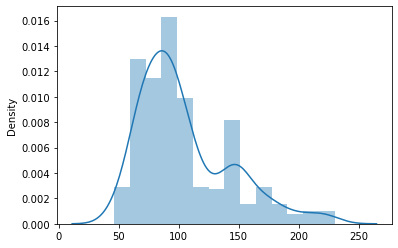

In [13]:
sns.distplot(mpg[['horsepower']])

In [15]:
# 결측치 퍼센트
(mpg.horsepower.isnull().sum() / mpg.shape[0]) * 100

1.507537688442211

In [16]:
# 결측치 처리(삭제)

mpg.dropna(subset=['horsepower'], axis=0, inplace=True)

In [18]:
mpg.shape

(392, 9)

In [20]:
# float 타입으로 바꾸기

mpg['horsepower'] = mpg.horsepower.astype("float")

In [21]:
mpg.horsepower.dtype

dtype('float64')

In [85]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### 독립변수(X), 종속변수(y) 정하기

- 독립변수: weight, horsepower, acceleration
- 종속변수: mpg

In [149]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [169]:
X = mpg[['horsepower', 'weight', 'acceleration', 'cylinders', 'displacement', 'origin', 'model year']].to_numpy()
X

array([[1.300e+02, 3.504e+03, 1.200e+01, ..., 3.070e+02, 1.000e+00,
        7.000e+01],
       [1.650e+02, 3.693e+03, 1.150e+01, ..., 3.500e+02, 1.000e+00,
        7.000e+01],
       [1.500e+02, 3.436e+03, 1.100e+01, ..., 3.180e+02, 1.000e+00,
        7.000e+01],
       ...,
       [8.400e+01, 2.295e+03, 1.160e+01, ..., 1.350e+02, 1.000e+00,
        8.200e+01],
       [7.900e+01, 2.625e+03, 1.860e+01, ..., 1.200e+02, 1.000e+00,
        8.200e+01],
       [8.200e+01, 2.720e+03, 1.940e+01, ..., 1.190e+02, 1.000e+00,
        8.200e+01]])

In [170]:
y = mpg['mpg'].to_numpy()
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

In [171]:
# 데이터 나누기

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
y_train

array([22. , 21. , 37. , 21. , 15. , 31. , 23. , 24.5, 29. , 30.5, 15. ,
       34.7, 27. , 28. , 19. , 41.5, 17.5, 29. , 26. , 31.8, 18. , 16.5,
       13. , 19. , 30. , 20. , 19. , 27. , 23. , 14. , 20.6, 27.9, 15. ,
       32. , 12. , 23. , 33.5, 25.5, 40.8, 16.5, 32.3, 44.3, 12. , 32.8,
       24. , 18.1, 14. , 13. , 11. , 18. , 32. , 27.2, 16. , 17.5, 12. ,
       26. , 14. , 28. , 20. , 13. , 27.2, 29. , 19.1, 28. , 27. , 19. ,
       26. , 15.5, 13. , 38. , 18. , 23.7, 24.5, 34. , 23. , 26. , 33. ,
       29.5, 15. , 24. , 32. , 14. , 14. , 39.1, 17.5, 17. , 21. , 33. ,
       25.8, 20.3, 24. , 20.2, 23.9, 34. , 20.2, 28.1, 13. , 39.4, 14. ,
       16. , 18.5, 20. , 32. , 18. , 26.5, 16. , 16. , 29. , 10. , 15. ,
       46.6, 20.5, 37. , 17.7, 44.6, 23.5, 31. , 14. , 29.8, 27. , 27. ,
       43.4, 20. , 36. , 20.2, 18. , 27. , 17.6, 18. , 38. , 17. , 18.5,
       14. , 43.1, 16. , 19. , 16. , 15. , 19. ,  9. , 25. , 31. , 26.4,
       27.2, 15.5, 13. , 30. , 21.5, 34.1, 23.9, 25

### 선형회귀모델

In [173]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [174]:
lr.coef_, lr.intercept_

(array([-0.02806989, -0.00600577,  0.04119833, -0.35963797,  0.01579344,
         1.67379885,  0.742086  ]),
 -16.36825980471729)

In [175]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8221075220232332
0.809736127618413


In [176]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_train_poly

array([[1.000e+00, 9.400e+01, 2.379e+03, ..., 9.000e+00, 2.190e+02,
        5.329e+03],
       [1.000e+00, 8.500e+01, 2.587e+03, ..., 1.000e+00, 7.000e+01,
        4.900e+03],
       [1.000e+00, 9.200e+01, 2.434e+03, ..., 9.000e+00, 2.400e+02,
        6.400e+03],
       ...,
       [1.000e+00, 8.500e+01, 2.855e+03, ..., 1.000e+00, 7.800e+01,
        6.084e+03],
       [1.000e+00, 6.500e+01, 2.380e+03, ..., 1.000e+00, 8.100e+01,
        6.561e+03],
       [1.000e+00, 1.500e+02, 4.997e+03, ..., 1.000e+00, 7.300e+01,
        5.329e+03]])

In [177]:
print(X_train_poly.shape)

(274, 36)


In [178]:
X_test_poly = poly.transform(X_test)

In [179]:
X_test

array([[6.900e+01, 2.189e+03, 1.800e+01, 4.000e+00, 9.600e+01, 2.000e+00,
        7.200e+01],
       [1.150e+02, 2.795e+03, 1.570e+01, 4.000e+00, 1.210e+02, 2.000e+00,
        7.800e+01],
       [6.000e+01, 1.800e+03, 1.640e+01, 4.000e+00, 9.100e+01, 3.000e+00,
        7.800e+01],
       [7.000e+01, 1.955e+03, 2.050e+01, 4.000e+00, 9.100e+01, 1.000e+00,
        7.100e+01],
       [8.600e+01, 2.790e+03, 1.560e+01, 4.000e+00, 1.400e+02, 1.000e+00,
        8.200e+01],
       [7.500e+01, 2.155e+03, 1.640e+01, 4.000e+00, 9.700e+01, 3.000e+00,
        7.600e+01],
       [1.700e+02, 4.746e+03, 1.200e+01, 8.000e+00, 4.000e+02, 1.000e+00,
        7.100e+01],
       [7.500e+01, 2.265e+03, 1.820e+01, 4.000e+00, 9.700e+01, 3.000e+00,
        7.700e+01],
       [9.500e+01, 3.264e+03, 1.600e+01, 6.000e+00, 2.250e+02, 1.000e+00,
        7.500e+01],
       [4.900e+01, 1.867e+03, 1.950e+01, 4.000e+00, 6.800e+01, 2.000e+00,
        7.300e+01],
       [1.900e+02, 3.850e+03, 8.500e+00, 8.000e+00, 3.900e+0

In [180]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [181]:
print(lr.score(X_train_poly, y_train))
print(lr.score(X_test_poly, y_test))

0.8510696099756478
0.808498164654246


## 특성 스케일링

In [182]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train_poly) # 훈련 데이터로 한번만 fit진행. 테스트 데이터는 fit이 아닌 transform을 적용

X_train_scaled = ss.transform(X_train_poly)
X_test_scaled = ss.transform(X_test_poly)

In [183]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [184]:
print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.9005044851184083
0.8554494501685244


## 릿지회귀

In [185]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train) # 스케일링으로 비율(스케일) 맞춰준 데이터(train_scaled)로 fit 맞추기
print(ridge.score(X_train_scaled, y_train))
print(ridge.score(X_test_scaled, y_test))

0.8868580881103147
0.8506319718264943


In [186]:
# 릿지회귀에서 적정한 alpha값 찾기

X_train_score = []
X_test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(X_train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    X_train_score.append(ridge.score(X_train_scaled, y_train))
    X_test_score.append(ridge.score(X_test_scaled, y_test))

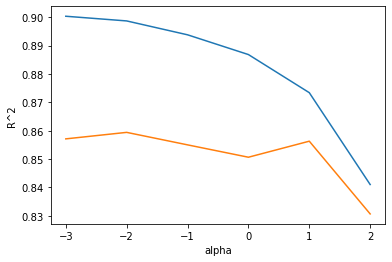

In [187]:
# 그래프 그리기 (alpha=10일때 가장 가까움)
plt.plot(np.log10(alpha_list), X_train_score)
plt.plot(np.log10(alpha_list), X_test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

In [191]:
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_train_scaled, y_train))
print(ridge.score(X_test_scaled, y_test))

0.8734087680299185
0.856290599642747


### 라쏘 회귀

In [188]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
print(lasso.score(X_train_scaled, y_train))
print(lasso.score(X_test_scaled, y_test))

0.8090107526354012
0.8240824760515021


In [189]:
# 라쏘회귀에서 적정한 alpha값 찾기

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 라쏘 모델을 생성
    lasso = Lasso(alpha=alpha)
    # 라쏘 모델을 훈련
    lasso.fit(X_train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(X_train_scaled, y_train))
    test_score.append(lasso.score(X_test_scaled, y_test))

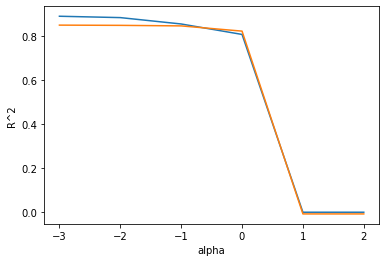

In [190]:
# alpha=0.1일 때 가장 가까움

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [192]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
print(lasso.score(X_train_scaled, y_train))
print(lasso.score(X_test_scaled, y_test))

0.8565965619782387
0.8478647147362735


### 결정트리(랜덤서치)모델

In [196]:
# 독립변수, 종속변수 가져오기
X = mpg[['horsepower', 'weight', 'acceleration', 'cylinders', 'displacement', 'origin', 'model year']]
y = mpg['mpg']

In [198]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [199]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.tree import DecisionTreeRegressor

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

gs = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029902716400>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000299020D1040>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029903E0E940>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029903EAA190>},
                   random_state=42)

In [200]:
gs.best_params_

{'max_depth': 28,
 'min_impurity_decrease': 0.000404781258158029,
 'min_samples_leaf': 6,
 'min_samples_split': 9}

In [201]:
np.max(gs.cv_results_['mean_test_score'])

0.8170041840670427

In [202]:
dt = gs.best_estimator_

dt.score(X_test, y_test)

0.8513235594792375

## 결과

- 선형회귀 점수 -> train: 85% test: 80%
- 스케일링 후 릿지회귀 점수 -> train: 87% test: 85%
- 라쏘회귀 점수 -> train: 85% test: 84%
- 결정트리(랜덤서치) 점수 -> test: 85%